In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from pathlib import Path

# check if workding_dir is in local variables
if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/papers/rapget-translation


In [3]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/papers/rapget-translation/.env


True

In [4]:
import os

model_name = os.getenv("MODEL_NAME")
adapter_name_or_path = os.getenv("ADAPTER_NAME_OR_PATH")
load_in_4bit = os.getenv("LOAD_IN_4BIT") == "true"
data_path = os.getenv("DATA_PATH")
results_path = "results/mac-results_fine_tuned.csv"  # os.getenv("RESULTS_PATH")
use_english_datasets = os.getenv("USE_ENGLISH_DATASETS") == "true"
max_new_tokens = int(os.getenv("MAX_NEW_TOKENS", 2048))

print(model_name, adapter_name_or_path, load_in_4bit, data_path, results_path, use_english_datasets, max_new_tokens)

Qwen/Qwen2-7B-Instruct None False datasets/mac/mac.tsv results/mac-results_fine_tuned.csv False 300


In [5]:
import pandas as pd
from llm_toolkit.llm_utils import *
from llm_toolkit.translation_utils import *

df = pd.read_csv(results_path)
df.info()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/inflaton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


loading: /Users/inflaton/code/engd/papers/rapget-translation/eval_modules/calc_repetitions.py
loading /Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/inflaton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 70 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   chinese                                                           1133 non-null   object
 1   english                                                           1133 non-null   object
 2   internlm/internlm2_5-7b-chat/epochs-01                            1133 non-null   object
 3   Qwen/Qwen2-7B-Instruct/epochs-01                                  1133 non-null   object
 4   shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/epochs-01               1133 non-null   object
 5   shenzhi-wang/Llama3.1-8B-Chinese-Chat/epochs-01                   1133 non-null   object
 6   internlm/internlm2_5-7b-chat/epochs-02                            1133 non-null   object
 7   internlm/internlm2_5-7b-chat/epochs-03    

In [6]:
result_columns = [col for col in df.columns[2:].to_list() if "rpp" not in col]
result_columns.sort()
result_columns

['Qwen/Qwen2-72B-Instruct/epochs-01',
 'Qwen/Qwen2-72B-Instruct/epochs-02',
 'Qwen/Qwen2-72B-Instruct/epochs-03',
 'Qwen/Qwen2-72B-Instruct/epochs-04',
 'Qwen/Qwen2-72B-Instruct/epochs-05',
 'Qwen/Qwen2-72B-Instruct/epochs-06',
 'Qwen/Qwen2-7B-Instruct/epochs-01',
 'Qwen/Qwen2-7B-Instruct/epochs-02',
 'Qwen/Qwen2-7B-Instruct/epochs-03',
 'Qwen/Qwen2-7B-Instruct/epochs-04',
 'Qwen/Qwen2-7B-Instruct/epochs-05',
 'Qwen/Qwen2-7B-Instruct/epochs-06',
 'internlm/internlm2_5-7b-chat/epochs-01',
 'internlm/internlm2_5-7b-chat/epochs-02',
 'internlm/internlm2_5-7b-chat/epochs-03',
 'internlm/internlm2_5-7b-chat/epochs-04',
 'internlm/internlm2_5-7b-chat/epochs-05',
 'internlm/internlm2_5-7b-chat/epochs-06',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/epochs-01',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/epochs-02',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/epochs-03',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/epochs-04',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/epochs-05',
 'shenzhi-wang/Llama3.1-70B

In [7]:
df_openai = pd.read_csv("results/mac-results_few_shots_openai.csv")
df_openai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   chinese                1133 non-null   object
 1   english                1133 non-null   object
 2   gpt-4o-mini/shots-00   1133 non-null   object
 3   gpt-4o-mini/shots-01   1133 non-null   object
 4   gpt-4o-mini/shots-03   1133 non-null   object
 5   gpt-4o-mini/shots-05   1133 non-null   object
 6   gpt-4o-mini/shots-10   1133 non-null   object
 7   gpt-4o-mini/shots-50   1133 non-null   object
 8   gpt-4o/shots-00        1133 non-null   object
 9   gpt-4o/shots-01        1133 non-null   object
 10  gpt-4o/shots-03        1133 non-null   object
 11  gpt-4o/shots-05        1133 non-null   object
 12  gpt-4o/shots-10        1133 non-null   object
 13  gpt-4o/shots-50        1133 non-null   object
 14  gpt-4o-mini/epochs-01  1133 non-null   object
 15  gpt-4o-mini/epochs-02

In [8]:
openai_cols = df_openai.columns[2:].tolist()
openai_cols = [col for col in openai_cols if "epochs" in col]
openai_cols

['gpt-4o-mini/epochs-01',
 'gpt-4o-mini/epochs-02',
 'gpt-4o-mini/epochs-03',
 'gpt-4o-mini/epochs-04',
 'gpt-4o-mini/epochs-05',
 'gpt-4o-mini/epochs-06']

In [9]:
columns = df.columns[:2].to_list() + result_columns
df = df[columns]
df[openai_cols] = df_openai[openai_cols]
columns = df.columns.to_list()
result_columns = df.columns[2:].to_list()
result_columns, columns

(['Qwen/Qwen2-72B-Instruct/epochs-01',
  'Qwen/Qwen2-72B-Instruct/epochs-02',
  'Qwen/Qwen2-72B-Instruct/epochs-03',
  'Qwen/Qwen2-72B-Instruct/epochs-04',
  'Qwen/Qwen2-72B-Instruct/epochs-05',
  'Qwen/Qwen2-72B-Instruct/epochs-06',
  'Qwen/Qwen2-7B-Instruct/epochs-01',
  'Qwen/Qwen2-7B-Instruct/epochs-02',
  'Qwen/Qwen2-7B-Instruct/epochs-03',
  'Qwen/Qwen2-7B-Instruct/epochs-04',
  'Qwen/Qwen2-7B-Instruct/epochs-05',
  'Qwen/Qwen2-7B-Instruct/epochs-06',
  'internlm/internlm2_5-7b-chat/epochs-01',
  'internlm/internlm2_5-7b-chat/epochs-02',
  'internlm/internlm2_5-7b-chat/epochs-03',
  'internlm/internlm2_5-7b-chat/epochs-04',
  'internlm/internlm2_5-7b-chat/epochs-05',
  'internlm/internlm2_5-7b-chat/epochs-06',
  'shenzhi-wang/Llama3.1-70B-Chinese-Chat/epochs-01',
  'shenzhi-wang/Llama3.1-70B-Chinese-Chat/epochs-02',
  'shenzhi-wang/Llama3.1-70B-Chinese-Chat/epochs-03',
  'shenzhi-wang/Llama3.1-70B-Chinese-Chat/epochs-04',
  'shenzhi-wang/Llama3.1-70B-Chinese-Chat/epochs-05',
  's

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 44 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   chinese                                              1133 non-null   object
 1   english                                              1133 non-null   object
 2   Qwen/Qwen2-72B-Instruct/epochs-01                    1133 non-null   object
 3   Qwen/Qwen2-72B-Instruct/epochs-02                    1133 non-null   object
 4   Qwen/Qwen2-72B-Instruct/epochs-03                    1133 non-null   object
 5   Qwen/Qwen2-72B-Instruct/epochs-04                    1133 non-null   object
 6   Qwen/Qwen2-72B-Instruct/epochs-05                    1133 non-null   object
 7   Qwen/Qwen2-72B-Instruct/epochs-06                    1133 non-null   object
 8   Qwen/Qwen2-7B-Instruct/epochs-01                     1133 non-null   object
 9

In [11]:
variant = "epochs"
metrics_df = get_metrics(df, max_output_tokens=max_new_tokens, variant=variant)
metrics_df

['Qwen/Qwen2-72B-Instruct' 'Qwen/Qwen2-7B-Instruct'
 'internlm/internlm2_5-7b-chat' 'shenzhi-wang/Llama3.1-70B-Chinese-Chat'
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat'
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat' 'gpt-4o-mini']
Qwen/Qwen2-72B-Instruct/epochs-01: {'meteor': 0.4689894616957893, 'sacrebleu': {'score': 18.065844028552757, 'counts': [14500, 6569, 3558, 2049], 'totals': [27672, 26539, 25408, 24278], 'precisions': [52.39953743856606, 24.75225140359471, 14.003463476070529, 8.43973968201664], 'bp': 0.9130227260435708, 'sys_len': 27672, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.18065844028552755, 'precisions': [0.5239953743856606, 0.2475225140359471, 0.1400346347607053, 0.0843973968201664], 'brevity_penalty': 0.9130227260435708, 'length_ratio': 0.9165948989731699, 'translation_length': 27672, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.5034661979157429, 'rouge2': 0.2611617260885871, 'rougeL': 0.4476546839210329, 'rougeLsum': 0.4474674769556675}, 'accuracy': 0.01412

/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(contains_chinese)
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))


gpt-4o-mini/epochs-06: {'meteor': 0.3792226866395673, 'sacrebleu': {'score': 11.982811850915233, 'counts': [12810, 4617, 2137, 1066], 'totals': [29116, 27983, 26868, 25757], 'precisions': [43.996428080780326, 16.499303148340065, 7.95369956825964, 4.138680746981403], 'bp': 0.9637850995333245, 'sys_len': 29116, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.11982811850915229, 'precisions': [0.43996428080780325, 0.16499303148340064, 0.0795369956825964, 0.04138680746981403], 'brevity_penalty': 0.9637850995333245, 'length_ratio': 0.9644253063928453, 'translation_length': 29116, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.42512244376932706, 'rouge2': 0.1757495245547652, 'rougeL': 0.369939509135015, 'rougeLsum': 0.37041119769552}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(contains_chinese)
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))


model  epochs    meteor     spbleu  \
0                     Qwen/Qwen2-72B-Instruct       1  0.468989  18.065844   
1                     Qwen/Qwen2-72B-Instruct       2  0.477542  18.979032   
2                     Qwen/Qwen2-72B-Instruct       3  0.463054  18.066219   
3                     Qwen/Qwen2-72B-Instruct       4  0.454036  16.975593   
4                     Qwen/Qwen2-72B-Instruct       5  0.441333  16.090609   
5                     Qwen/Qwen2-72B-Instruct       6  0.439274  15.615748   
6                      Qwen/Qwen2-7B-Instruct       1  0.406770  13.127239   
7                      Qwen/Qwen2-7B-Instruct       2  0.427677  14.782460   
8                      Qwen/Qwen2-7B-Instruct       3  0.444096  15.514758   
9                      Qwen/Qwen2-7B-Instruct       4  0.440138  15.217827   
10                     Qwen/Qwen2-7B-Instruct       5  0.435675  14.823013   
11                     Qwen/Qwen2-7B-Instruct       6  0.436153  14.965352   
12               internlm/internlm2_5-7b-chat       1  0.381014  11.999934   
13               internlm/internlm2_5-7b-chat       2  0.405713  13.753748   
14               internlm/internlm2_5-7b-chat       3  0.420791  14.373117   
15               internlm/internlm2_5-7b-chat       4  0.431093  15.104731   
16               internlm/internlm2_5-7b-chat       5  0.425150  14.854584   
17               internlm/internlm2_5-7b-chat       6  0.425637  14.867310   
18     shenzhi-wang/Llama3.1-70B-Chinese-Chat       1  0.429608  15.325299   
19     shenzhi-wang/Llama3.1-70B-Chinese-Chat       2  0.455615  17.389741   
20     shenzhi-wang/Llama3.1-70B-Chinese-Chat       3  0.460877  17.719650   
21     shenzhi-wang/Llama3.1-70B-Chinese-Chat       4  0.446636  16.467606   
22     shenzhi-wang/Llama3.1-70B-Chinese-Chat       5  0.437621  15.619591   
23     shenzhi-wang/Llama3.1-70B-Chinese-Chat       6  0.429413  14.903520   
24      shenzhi-wang/Llama3.1-8B-Chinese-Chat       1  0.392366  12.373115   
25      shenzhi-wang/Llama3.1-8B-Chinese-Chat       2  0.417323  14.079363   
26      shenzhi-wang/Llama3.1-8B-Chinese-Chat       3  0.433494  15.393154   
27      shenzhi-wang/Llama3.1-8B-Chinese-Chat       4  0.432840  15.400852   
28      shenzhi-wang/Llama3.1-8B-Chinese-Chat       5  0.429451  15.110463   
29      shenzhi-wang/Llama3.1-8B-Chinese-Chat       6  0.426532  14.685736   
30  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       1  0.377825  11.352361   
31  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       2  0.405456  13.468536   
32  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       3  0.402731  13.298446   
33  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       4  0.400584  12.830936   
34  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       5  0.391492  12.389840   
35  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       6  0.384367  11.760110   
36                                gpt-4o-mini       1  0.378537  12.052844   
37                                gpt-4o-mini       2  0.378592  12.033707   
38                                gpt-4o-mini       3  0.377362  11.933111   
39                                gpt-4o-mini       4  0.378185  11.933286   
40                                gpt-4o-mini       5  0.379067  11.955698   
41                                gpt-4o-mini       6  0.379223  11.982812   

      bleu_1   rouge_l  ews_score  repetition_score  total_repetitions  \
0   0.180658  0.447655        0.0          0.040600           0.040600   
1   0.189790  0.451022        0.0          0.081200           0.081200   
2   0.180662  0.436228        0.0          0.094440           0.094440   
3   0.169756  0.422732        0.0          0.120035           0.120035   
4   0.160906  0.408864        0.0          1.176523           1.176523   
5   0.156157  0.407306        0.0          0.424537           0.424537   
6   0.131272  0.391912        0.0          0.073257           0.073257   
7   0.147825  0.408786        0.0          2.097087           2.097087   
8   0.155148  0.418

In [12]:
time_df = load_eval_times("logs", total_entries=len(df), variant=variant)
time_df

Loading content of logs/l40-1gpu-epoch-1.txt
Loading content of logs/l40-1gpu-fine-tuned.txt
Loading content of logs/l40-1gpu-rpp-1.txt
Loading content of logs/l40-1gpu-rpp-2.txt
Loading content of logs/l40-1gpu-rpp-3.txt
Loading content of logs/l40-1gpu.txt
Error processing log file: logs/l40-1gpu.txt
'utf-8' codec can't decode byte 0xe2 in position 0: unexpected end of data
Loading content of logs/l40-4gpu-1.txt
Loading content of logs/l40-4gpu-2.txt
Loading content of logs/l40-4gpu-3.txt
Loading content of logs/l40-4gpu-4.txt
Loading content of logs/l40-4gpu-5.txt
Loading content of logs/l40-4gpu-6.txt
Loading content of logs/l40-4gpu-7.txt
Loading content of logs/openai-gpt-4o-mini-fine-tuned.txt
Loading content of logs/openai-gpt-4o-mini.txt
Loading content of logs/openai-gpt-4o.txt
Loading content of logs/openai-training-sample.jsonl
Loading content of logs/tune-qwen2-70b.txt


model  epochs  eval_time
0                internlm/internlm2_5-7b-chat       1   1.536628
4                internlm/internlm2_5-7b-chat       2   1.565755
5                internlm/internlm2_5-7b-chat       3   1.598411
6                internlm/internlm2_5-7b-chat       4   1.556929
7                internlm/internlm2_5-7b-chat       5   1.578111
8                internlm/internlm2_5-7b-chat       6   1.556046
9                      Qwen/Qwen2-7B-Instruct       1   1.173875
10                     Qwen/Qwen2-7B-Instruct       2   1.263019
11                     Qwen/Qwen2-7B-Instruct       3   1.269197
12                     Qwen/Qwen2-7B-Instruct       4   1.234775
13                     Qwen/Qwen2-7B-Instruct       5   1.262136
14                     Qwen/Qwen2-7B-Instruct       6   1.238305
15  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       1   1.324801
16  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       2   1.376876
17  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       3   1.372462
18  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       4   1.421006
19  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       5   1.456311
20  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       6   1.497793
21      shenzhi-wang/Llama3.1-8B-Chinese-Chat       1   1.225949
22      shenzhi-wang/Llama3.1-8B-Chinese-Chat       2   1.198588
23      shenzhi-wang/Llama3.1-8B-Chinese-Chat       3   1.234775
24      shenzhi-wang/Llama3.1-8B-Chinese-Chat       4   1.218888
25      shenzhi-wang/Llama3.1-8B-Chinese-Chat       5   1.235658
26      shenzhi-wang/Llama3.1-8B-Chinese-Chat       6   1.230362
27     shenzhi-wang/Llama3.1-70B-Chinese-Chat       1  15.308914
28     shenzhi-wang/Llama3.1-70B-Chinese-Chat       2  15.309797
29     shenzhi-wang/Llama3.1-70B-Chinese-Chat       3  16.096205
30     shenzhi-wang/Llama3.1-70B-Chinese-Chat       4  16.263019
31     shenzhi-wang/Llama3.1-70B-Chinese-Chat       5  16.224184
32     shenzhi-wang/Llama3.1-70B-Chinese-Chat       6  16.559576
33                    Qwen/Qwen2-72B-Instruct       1  15.127979
34                    Qwen/Qwen2-72B-Instruct       2  15.532215
35                    Qwen/Qwen2-72B-Instruct       3  15.616064
36                    Qwen/Qwen2-72B-Instruct       4  16.109444
37                    Qwen/Qwen2-72B-Instruct       5  16.624007
38                    Qwen/Qwen2-72B-Instruct       6  16.712268
39                                gpt-4o-mini       1   0.889673
40                                gpt-4o-mini       2   0.949691
41                                gpt-4o-mini       3   0.902030
42                                gpt-4o-mini       4   0.984113
43                                gpt-4o-mini       5   0.835834
44                                gpt-4o-mini       6   0.832304

In [13]:
# Merge time_df into metrics_df
metrics_df.drop(columns=["eval_time"], inplace=True, errors="ignore")
metrics_df = pd.merge(metrics_df, time_df, on=["model", variant], how="left")
metrics_df

model  epochs    meteor     spbleu  \
0                     Qwen/Qwen2-72B-Instruct       1  0.468989  18.065844   
1                     Qwen/Qwen2-72B-Instruct       2  0.477542  18.979032   
2                     Qwen/Qwen2-72B-Instruct       3  0.463054  18.066219   
3                     Qwen/Qwen2-72B-Instruct       4  0.454036  16.975593   
4                     Qwen/Qwen2-72B-Instruct       5  0.441333  16.090609   
5                     Qwen/Qwen2-72B-Instruct       6  0.439274  15.615748   
6                      Qwen/Qwen2-7B-Instruct       1  0.406770  13.127239   
7                      Qwen/Qwen2-7B-Instruct       2  0.427677  14.782460   
8                      Qwen/Qwen2-7B-Instruct       3  0.444096  15.514758   
9                      Qwen/Qwen2-7B-Instruct       4  0.440138  15.217827   
10                     Qwen/Qwen2-7B-Instruct       5  0.435675  14.823013   
11                     Qwen/Qwen2-7B-Instruct       6  0.436153  14.965352   
12               internlm/internlm2_5-7b-chat       1  0.381014  11.999934   
13               internlm/internlm2_5-7b-chat       2  0.405713  13.753748   
14               internlm/internlm2_5-7b-chat       3  0.420791  14.373117   
15               internlm/internlm2_5-7b-chat       4  0.431093  15.104731   
16               internlm/internlm2_5-7b-chat       5  0.425150  14.854584   
17               internlm/internlm2_5-7b-chat       6  0.425637  14.867310   
18     shenzhi-wang/Llama3.1-70B-Chinese-Chat       1  0.429608  15.325299   
19     shenzhi-wang/Llama3.1-70B-Chinese-Chat       2  0.455615  17.389741   
20     shenzhi-wang/Llama3.1-70B-Chinese-Chat       3  0.460877  17.719650   
21     shenzhi-wang/Llama3.1-70B-Chinese-Chat       4  0.446636  16.467606   
22     shenzhi-wang/Llama3.1-70B-Chinese-Chat       5  0.437621  15.619591   
23     shenzhi-wang/Llama3.1-70B-Chinese-Chat       6  0.429413  14.903520   
24      shenzhi-wang/Llama3.1-8B-Chinese-Chat       1  0.392366  12.373115   
25      shenzhi-wang/Llama3.1-8B-Chinese-Chat       2  0.417323  14.079363   
26      shenzhi-wang/Llama3.1-8B-Chinese-Chat       3  0.433494  15.393154   
27      shenzhi-wang/Llama3.1-8B-Chinese-Chat       4  0.432840  15.400852   
28      shenzhi-wang/Llama3.1-8B-Chinese-Chat       5  0.429451  15.110463   
29      shenzhi-wang/Llama3.1-8B-Chinese-Chat       6  0.426532  14.685736   
30  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       1  0.377825  11.352361   
31  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       2  0.405456  13.468536   
32  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       3  0.402731  13.298446   
33  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       4  0.400584  12.830936   
34  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       5  0.391492  12.389840   
35  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       6  0.384367  11.760110   
36                                gpt-4o-mini       1  0.378537  12.052844   
37                                gpt-4o-mini       2  0.378592  12.033707   
38                                gpt-4o-mini       3  0.377362  11.933111   
39                                gpt-4o-mini       4  0.378185  11.933286   
40                                gpt-4o-mini       5  0.379067  11.955698   
41                                gpt-4o-mini       6  0.379223  11.982812   

      bleu_1   rouge_l  ews_score  repetition_score  total_repetitions  \
0   0.180658  0.447655        0.0          0.040600           0.040600   
1   0.189790  0.451022        0.0          0.081200           0.081200   
2   0.180662  0.436228        0.0          0.094440           0.094440   
3   0.169756  0.422732        0.0          0.120035           0.120035   
4   0.160906  0.408864        0.0          1.176523           1.176523   
5   0.156157  0.407306        0.0          0.424537           0.424537   
6   0.131272  0.391912        0.0          0.073257           0.073257   
7   0.147825  0.408786        0.0          2.097087           2.097087   
8   0.155148  0.418

In [14]:
models = metrics_df["model"].unique()
models

array(['Qwen/Qwen2-72B-Instruct', 'Qwen/Qwen2-7B-Instruct',
       'internlm/internlm2_5-7b-chat',
       'shenzhi-wang/Llama3.1-70B-Chinese-Chat',
       'shenzhi-wang/Llama3.1-8B-Chinese-Chat',
       'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat', 'gpt-4o-mini'],
      dtype=object)

In [15]:
df_few_shots = pd.read_csv("results/mac-results_few_shots_metrics.csv")
df_few_shots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   model                        48 non-null     object 
 1   shots                        48 non-null     int64  
 2   meteor                       48 non-null     float64
 3   spbleu                       48 non-null     float64
 4   bleu_1                       48 non-null     float64
 5   rouge_l                      48 non-null     float64
 6   ews_score                    48 non-null     float64
 7   repetition_score             48 non-null     float64
 8   total_repetitions            48 non-null     float64
 9   rap                          48 non-null     float64
 10  num_incomplete_translations  48 non-null     int64  
 11  num_max_output_tokens        48 non-null     int64  
 12  eval_time                    46 non-null     float64
dtypes: float64(9), int64(3

In [16]:
temp = df_few_shots[df_few_shots["model"].isin(models)]
df_base = temp[temp["shots"] == 0].rename(columns={"shots": variant})
df_base

model  epochs    meteor     spbleu  \
0                     Qwen/Qwen2-72B-Instruct       0  0.400364  12.223833   
6                      Qwen/Qwen2-7B-Instruct       0  0.377477  11.783493   
12               internlm/internlm2_5-7b-chat       0  0.368168  11.360521   
18     shenzhi-wang/Llama3.1-70B-Chinese-Chat       0  0.363870  10.874678   
24      shenzhi-wang/Llama3.1-8B-Chinese-Chat       0  0.347622   9.799439   
30  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       0  0.328500   8.313795   
36                                gpt-4o-mini       0  0.379770  12.082384   

      bleu_1   rouge_l  ews_score  repetition_score  total_repetitions  \
0   0.122238  0.384867        0.0          0.195940           0.195940   
6   0.117835  0.367852        0.0          0.071492           0.071492   
12  0.113605  0.360006        0.0          0.214475           0.214475   
18  0.108747  0.353365        0.0          0.154457           0.154457   
24  0.097994  0.334935        0.0          2.216240           2.216240   
30  0.083138  0.318374        0.0          0.127979           0.127979   
36  0.120824  0.370558        0.0          0.095322           0.095322   

         rap  num_incomplete_translations  num_max_output_tokens  eval_time  
0   0.397018                           37                      1   8.894969  
6   0.376313                           89                      0   0.980583  
12  0.364806                           10                      0   1.224184  
18  0.361464                           55                      0   7.833186  
24  0.319818                           16                      2   1.075022  
30  0.326695                           18                      0   1.204766  
36  0.378211                           22                      0   1.593998

In [17]:
metrics_df = pd.concat([df_base, metrics_df], ignore_index=True)
metrics_df

model  epochs    meteor     spbleu  \
0                     Qwen/Qwen2-72B-Instruct       0  0.400364  12.223833   
1                      Qwen/Qwen2-7B-Instruct       0  0.377477  11.783493   
2                internlm/internlm2_5-7b-chat       0  0.368168  11.360521   
3      shenzhi-wang/Llama3.1-70B-Chinese-Chat       0  0.363870  10.874678   
4       shenzhi-wang/Llama3.1-8B-Chinese-Chat       0  0.347622   9.799439   
5   shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       0  0.328500   8.313795   
6                                 gpt-4o-mini       0  0.379770  12.082384   
7                     Qwen/Qwen2-72B-Instruct       1  0.468989  18.065844   
8                     Qwen/Qwen2-72B-Instruct       2  0.477542  18.979032   
9                     Qwen/Qwen2-72B-Instruct       3  0.463054  18.066219   
10                    Qwen/Qwen2-72B-Instruct       4  0.454036  16.975593   
11                    Qwen/Qwen2-72B-Instruct       5  0.441333  16.090609   
12                    Qwen/Qwen2-72B-Instruct       6  0.439274  15.615748   
13                     Qwen/Qwen2-7B-Instruct       1  0.406770  13.127239   
14                     Qwen/Qwen2-7B-Instruct       2  0.427677  14.782460   
15                     Qwen/Qwen2-7B-Instruct       3  0.444096  15.514758   
16                     Qwen/Qwen2-7B-Instruct       4  0.440138  15.217827   
17                     Qwen/Qwen2-7B-Instruct       5  0.435675  14.823013   
18                     Qwen/Qwen2-7B-Instruct       6  0.436153  14.965352   
19               internlm/internlm2_5-7b-chat       1  0.381014  11.999934   
20               internlm/internlm2_5-7b-chat       2  0.405713  13.753748   
21               internlm/internlm2_5-7b-chat       3  0.420791  14.373117   
22               internlm/internlm2_5-7b-chat       4  0.431093  15.104731   
23               internlm/internlm2_5-7b-chat       5  0.425150  14.854584   
24               internlm/internlm2_5-7b-chat       6  0.425637  14.867310   
25     shenzhi-wang/Llama3.1-70B-Chinese-Chat       1  0.429608  15.325299   
26     shenzhi-wang/Llama3.1-70B-Chinese-Chat       2  0.455615  17.389741   
27     shenzhi-wang/Llama3.1-70B-Chinese-Chat       3  0.460877  17.719650   
28     shenzhi-wang/Llama3.1-70B-Chinese-Chat       4  0.446636  16.467606   
29     shenzhi-wang/Llama3.1-70B-Chinese-Chat       5  0.437621  15.619591   
30     shenzhi-wang/Llama3.1-70B-Chinese-Chat       6  0.429413  14.903520   
31      shenzhi-wang/Llama3.1-8B-Chinese-Chat       1  0.392366  12.373115   
32      shenzhi-wang/Llama3.1-8B-Chinese-Chat       2  0.417323  14.079363   
33      shenzhi-wang/Llama3.1-8B-Chinese-Chat       3  0.433494  15.393154   
34      shenzhi-wang/Llama3.1-8B-Chinese-Chat       4  0.432840  15.400852   
35      shenzhi-wang/Llama3.1-8B-Chinese-Chat       5  0.429451  15.110463   
36      shenzhi-wang/Llama3.1-8B-Chinese-Chat       6  0.426532  14.685736   
37  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       1  0.377825  11.352361   
38  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       2  0.405456  13.468536   
39  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       3  0.402731  13.298446   
40  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       4  0.400584  12.830936   
41  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       5  0.391492  12.389840   
42  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       6  0.384367  11.760110   
43                                gpt-4o-mini       1  0.378537  12.052844   
44                                gpt-4o-mini       2  0.378592  12.033707   
45                                gpt-4o-mini       3  0.377362  11.933111   
46                                gpt-4o-mini       4  0.378185  11.933286   
47                                gpt-4o-mini       5  0.379067  11.955698   
48                                gpt-4o-mini       6  0.379223  11.982812   

      bleu_1   rouge_l  ews_score  repetition_score  total_repetitions  \
0   0.122238  0.384867        0.0          0.195940           0.1

In [18]:
# sort metrics_df by model and epochs
metrics_df.sort_values(["model", variant], inplace=True)
metrics_df

model  epochs    meteor     spbleu  \
0                     Qwen/Qwen2-72B-Instruct       0  0.400364  12.223833   
7                     Qwen/Qwen2-72B-Instruct       1  0.468989  18.065844   
8                     Qwen/Qwen2-72B-Instruct       2  0.477542  18.979032   
9                     Qwen/Qwen2-72B-Instruct       3  0.463054  18.066219   
10                    Qwen/Qwen2-72B-Instruct       4  0.454036  16.975593   
11                    Qwen/Qwen2-72B-Instruct       5  0.441333  16.090609   
12                    Qwen/Qwen2-72B-Instruct       6  0.439274  15.615748   
1                      Qwen/Qwen2-7B-Instruct       0  0.377477  11.783493   
13                     Qwen/Qwen2-7B-Instruct       1  0.406770  13.127239   
14                     Qwen/Qwen2-7B-Instruct       2  0.427677  14.782460   
15                     Qwen/Qwen2-7B-Instruct       3  0.444096  15.514758   
16                     Qwen/Qwen2-7B-Instruct       4  0.440138  15.217827   
17                     Qwen/Qwen2-7B-Instruct       5  0.435675  14.823013   
18                     Qwen/Qwen2-7B-Instruct       6  0.436153  14.965352   
6                                 gpt-4o-mini       0  0.379770  12.082384   
43                                gpt-4o-mini       1  0.378537  12.052844   
44                                gpt-4o-mini       2  0.378592  12.033707   
45                                gpt-4o-mini       3  0.377362  11.933111   
46                                gpt-4o-mini       4  0.378185  11.933286   
47                                gpt-4o-mini       5  0.379067  11.955698   
48                                gpt-4o-mini       6  0.379223  11.982812   
2                internlm/internlm2_5-7b-chat       0  0.368168  11.360521   
19               internlm/internlm2_5-7b-chat       1  0.381014  11.999934   
20               internlm/internlm2_5-7b-chat       2  0.405713  13.753748   
21               internlm/internlm2_5-7b-chat       3  0.420791  14.373117   
22               internlm/internlm2_5-7b-chat       4  0.431093  15.104731   
23               internlm/internlm2_5-7b-chat       5  0.425150  14.854584   
24               internlm/internlm2_5-7b-chat       6  0.425637  14.867310   
3      shenzhi-wang/Llama3.1-70B-Chinese-Chat       0  0.363870  10.874678   
25     shenzhi-wang/Llama3.1-70B-Chinese-Chat       1  0.429608  15.325299   
26     shenzhi-wang/Llama3.1-70B-Chinese-Chat       2  0.455615  17.389741   
27     shenzhi-wang/Llama3.1-70B-Chinese-Chat       3  0.460877  17.719650   
28     shenzhi-wang/Llama3.1-70B-Chinese-Chat       4  0.446636  16.467606   
29     shenzhi-wang/Llama3.1-70B-Chinese-Chat       5  0.437621  15.619591   
30     shenzhi-wang/Llama3.1-70B-Chinese-Chat       6  0.429413  14.903520   
4       shenzhi-wang/Llama3.1-8B-Chinese-Chat       0  0.347622   9.799439   
31      shenzhi-wang/Llama3.1-8B-Chinese-Chat       1  0.392366  12.373115   
32      shenzhi-wang/Llama3.1-8B-Chinese-Chat       2  0.417323  14.079363   
33      shenzhi-wang/Llama3.1-8B-Chinese-Chat       3  0.433494  15.393154   
34      shenzhi-wang/Llama3.1-8B-Chinese-Chat       4  0.432840  15.400852   
35      shenzhi-wang/Llama3.1-8B-Chinese-Chat       5  0.429451  15.110463   
36      shenzhi-wang/Llama3.1-8B-Chinese-Chat       6  0.426532  14.685736   
5   shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       0  0.328500   8.313795   
37  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       1  0.377825  11.352361   
38  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       2  0.405456  13.468536   
39  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       3  0.402731  13.298446   
40  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       4  0.400584  12.830936   
41  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       5  0.391492  12.389840   
42  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       6  0.384367  11.760110   

      bleu_1   rouge_l  ews_score  repetition_score  total_repetitions  \
0   0.122238  0.384867        0.0          0.195940           0.1

In [19]:
# list of markers for plotting
markers = ["o", "x", "^", "s", "d", "P", "X", "*", "v", ">", "<", "p", "h", "H", "+", "|", "_"]
markers = {model: marker for model, marker in zip(models, markers)}

In [20]:
model_orders = {
    "internlm/internlm2_5-7b-chat": 10,
    "Qwen/Qwen2-7B-Instruct": 20,
    "shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat": 30,
    "shenzhi-wang/Llama3.1-8B-Chinese-Chat": 40,
    "shenzhi-wang/Llama3.1-70B-Chinese-Chat": 50,
    "Qwen/Qwen2-72B-Instruct": 60,
    "gpt-4o-mini": 99,
    "gpt-4o": 100,
}

In [21]:
# plot mtr vs rpp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


def plot_metrics_vs_shots(metrics_df, models, markers, columns, titles, log_scales=[False, False], sync_y_axis=False):
    fig, ax = plt.subplots(figsize=(10, 6))
    # set grid
    ax.grid(True)
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which="major", linestyle="-", linewidth="0.5", color="red")

    # Create a mapping from original x-values to new, evenly spaced x-values
    original_x_values = sorted(metrics_df[variant].unique())
    new_x_values = range(len(original_x_values))
    x_mapping = dict(zip(original_x_values, new_x_values))

    if len(columns) > 1:
        twin = ax.twinx()

    for model in models:
        model_df = metrics_df[metrics_df["model"] == model]
        transformed_x = [x_mapping[x] for x in model_df[variant]]
        for i, column in enumerate(columns):
            current_ax =  twin if i > 0 else ax
            current_ax.plot(
                transformed_x,
                model_df[column],
                label=model + f" [{titles[i]}]" if titles else "",
                marker=markers[model],
                linestyle="--" if i > 0 else "-",
            )
            current_ax.set_ylabel(titles[i])
            if log_scales[i]:
                current_ax.set_yscale("log")

    if sync_y_axis:
        ax.set_ylim(
            min(ax.get_ylim()[0], twin.get_ylim()[0]),
            max(ax.get_ylim()[1], twin.get_ylim()[1]),
        )
        twin.set_ylim(ax.get_ylim())

    # Set the x-axis ticks to be evenly spaced
    ax.xaxis.set_major_locator(ticker.FixedLocator(new_x_values))

    # Set custom labels for the ticks
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(original_x_values))

    # ax.set_ylim(0, 1)
    ax.set_xlabel("Epoch (0: Base, 1-6: Fine-tuned)")
    handles, labels = ax.get_legend_handles_labels()

    if len(columns) > 1:
        handles_twin, labels_twin = twin.get_legend_handles_labels()
        handles += handles_twin
        labels += labels_twin

    # Sort the handles and labels by labels
    sorted_handles_labels = sorted(zip(labels, handles), key=lambda x: model_orders[x[0].split(" ")[0]])
    sorted_labels, sorted_handles = zip(*sorted_handles_labels)

    # Create a combined legend
    ax.legend(
        sorted_handles,
        sorted_labels,
        loc="lower center",
        bbox_to_anchor=(0.5, -0.75 if len(columns) > 1 else -0.45),
    )

    plt.show()

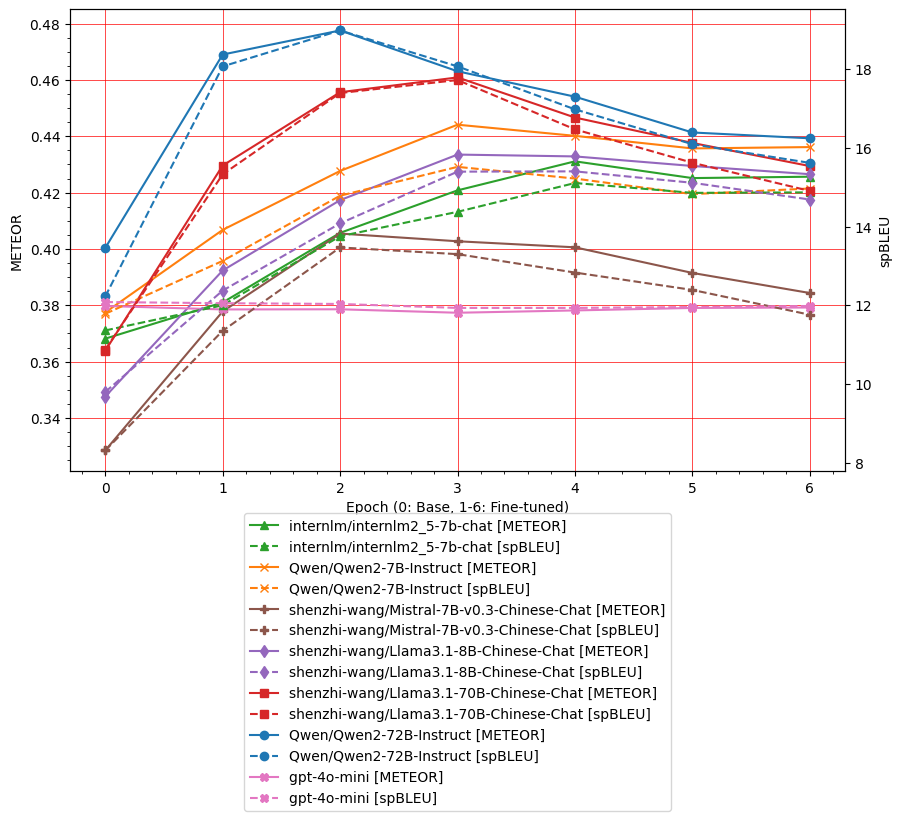

In [22]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["meteor", "spbleu"],
    ["METEOR", "spBLEU"],
)

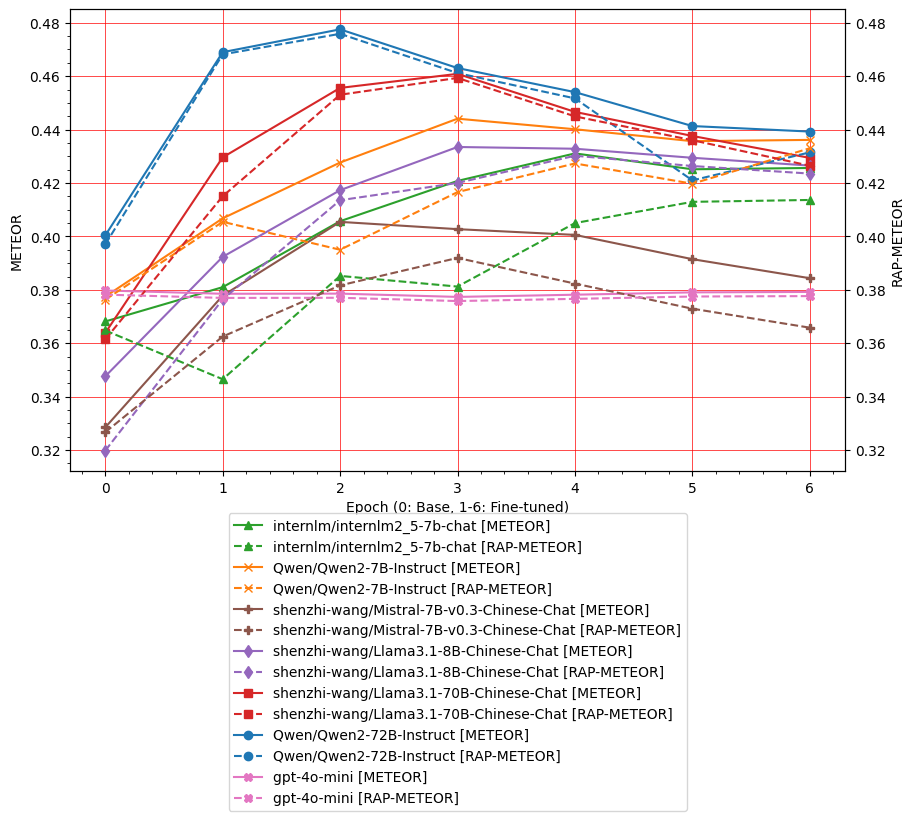

In [23]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["meteor", "rap"],
    ["METEOR", "RAP-METEOR"],
    sync_y_axis=True,
)

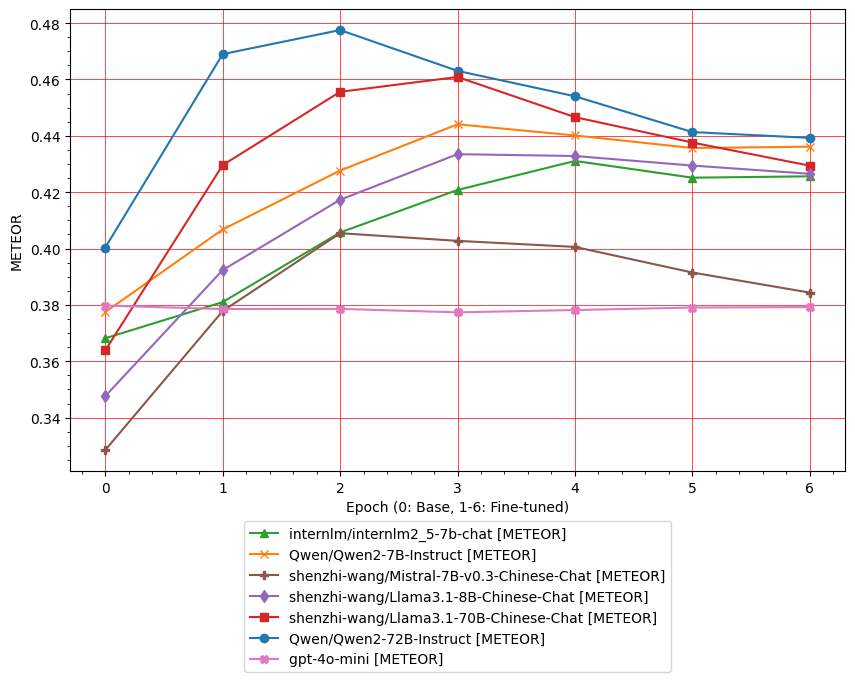

In [24]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["meteor"],
    ["METEOR"],
)

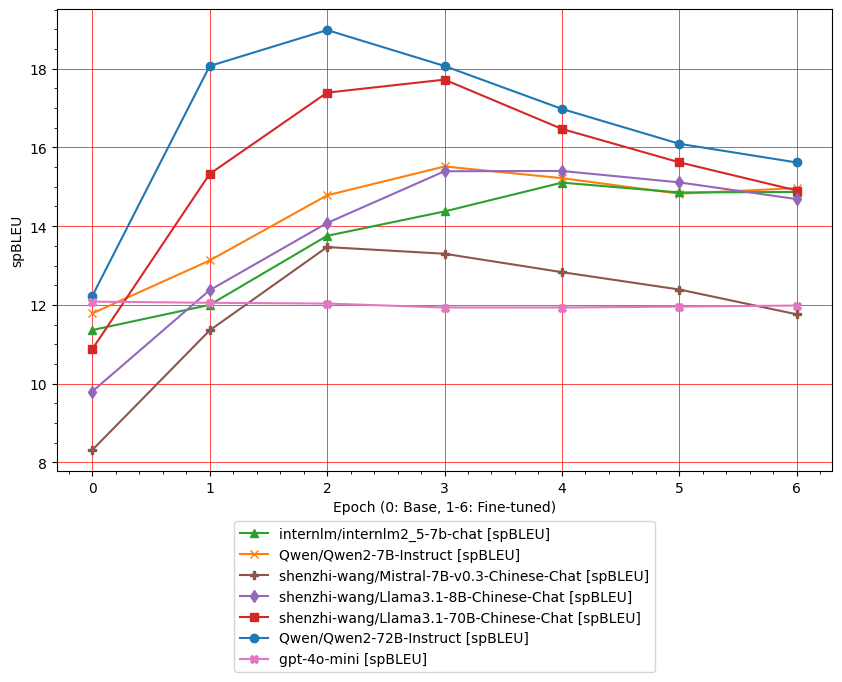

In [25]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["spbleu"],
    ["spBLEU"],
)

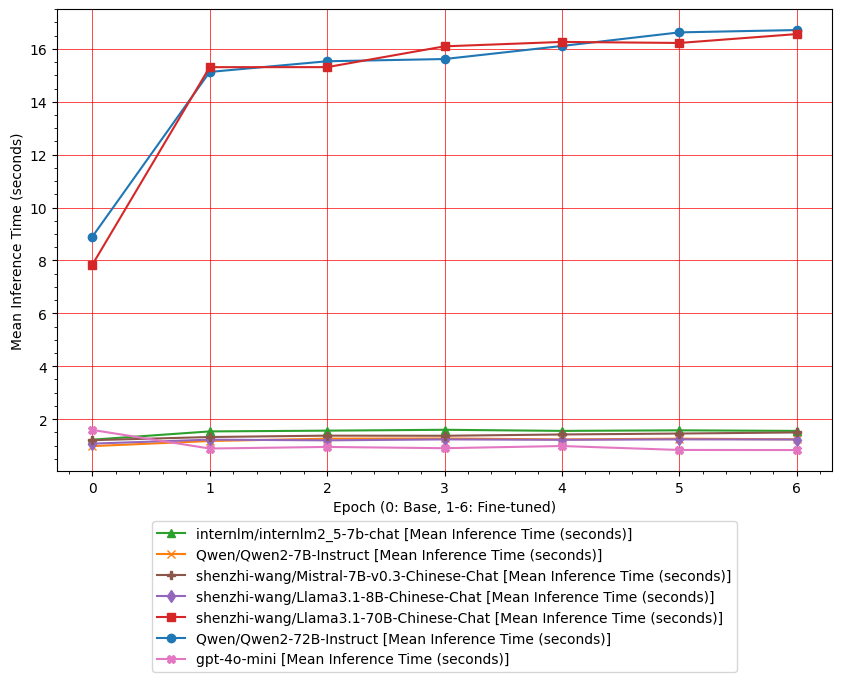

In [26]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["eval_time"],
    ["Mean Inference Time (seconds)"],
    # log_scales=[True],
)

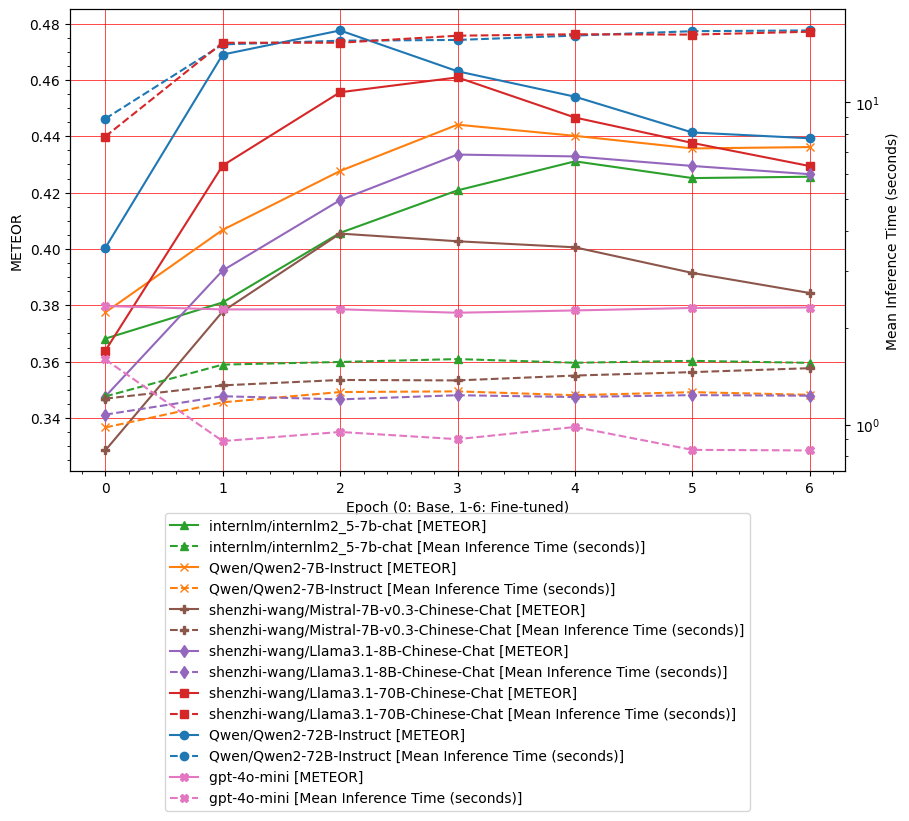

In [27]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["meteor", "eval_time"],
    ["METEOR", "Mean Inference Time (seconds)"],
    log_scales=[False, True],
)

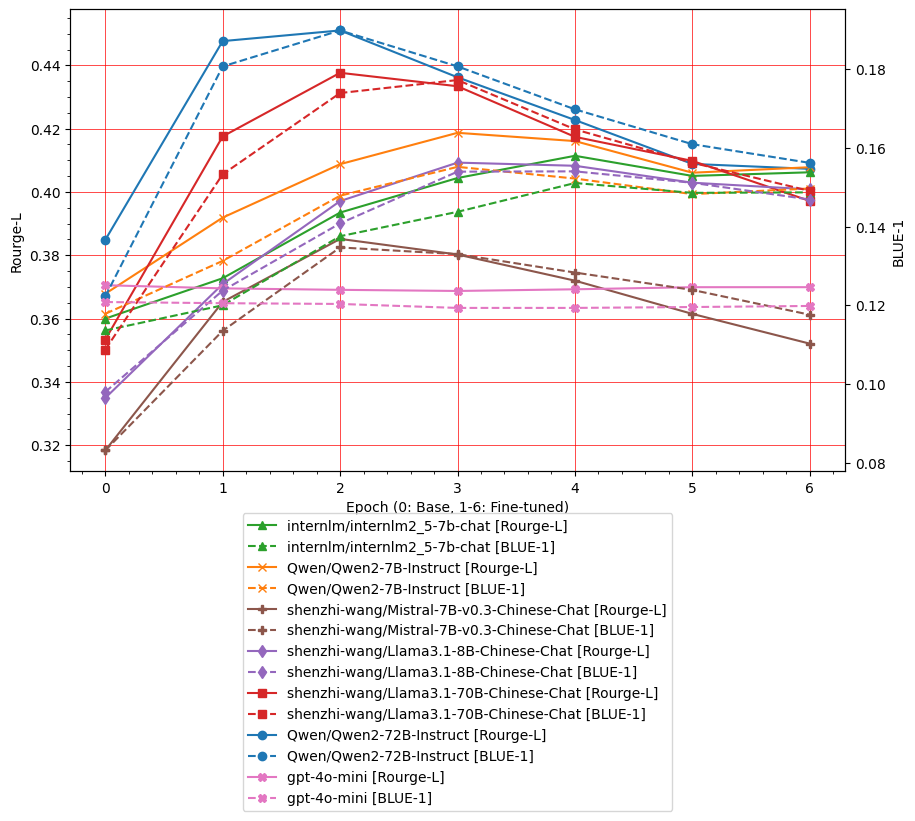

In [28]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["rouge_l", "bleu_1"],
    ["Rourge-L", "BLUE-1"],
)

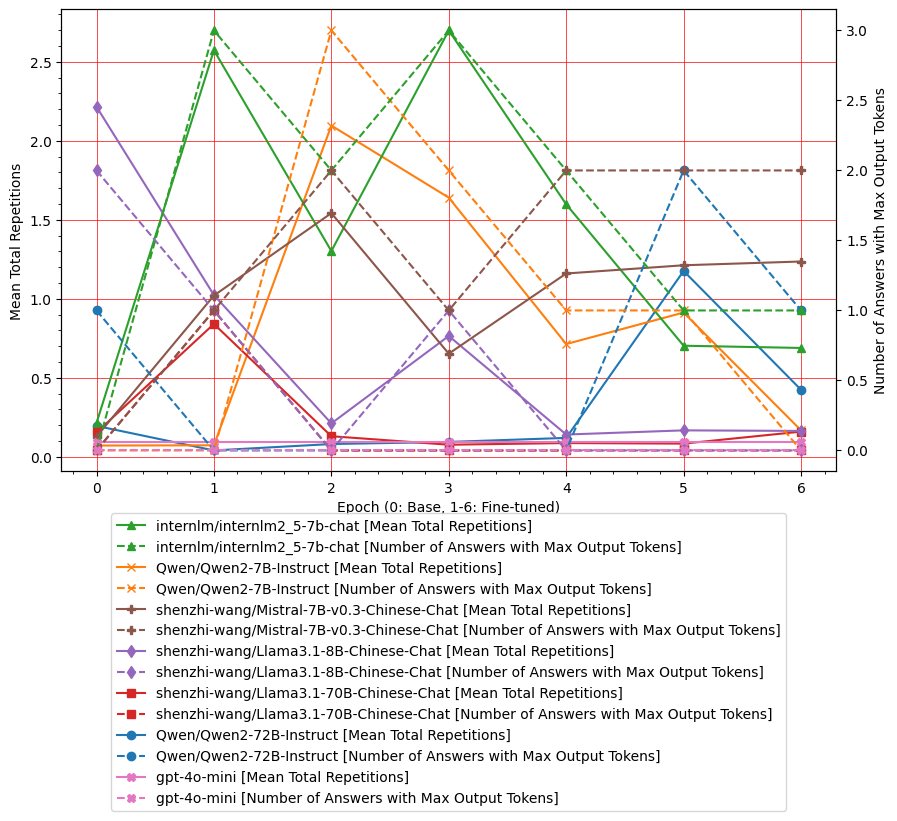

In [29]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["total_repetitions", "num_max_output_tokens"],
    ["Mean Total Repetitions", "Number of Answers with Max Output Tokens"],
)

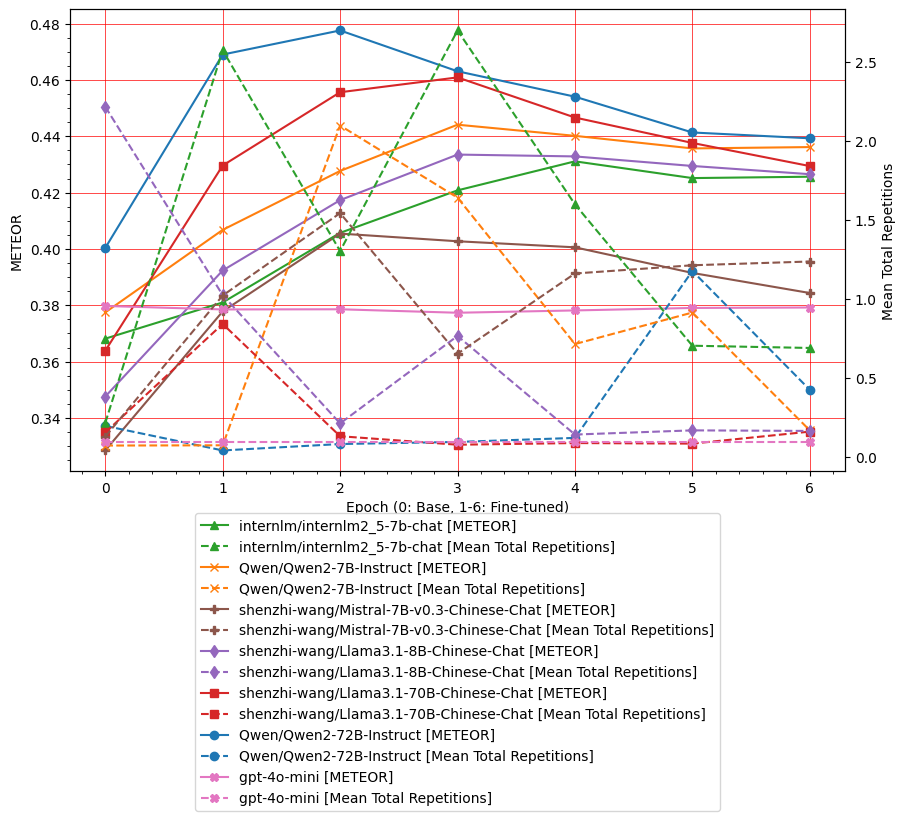

In [30]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["meteor", "total_repetitions"],
    ["METEOR", "Mean Total Repetitions"],
)

In [31]:
for col in result_columns:
    print(f"### Analyzing: {col}")
    analyze_translation_results(df, col, repetition_threshold=50)

### Analyzing: Qwen/Qwen2-72B-Instruct/epochs-01
*** Found 0 rows with total_repetitions > 50 for Qwen/Qwen2-72B-Instruct/epochs-01

*** Found 0 rows with output_tokens >= 300 for Qwen/Qwen2-72B-Instruct/epochs-01

*** Found 1 rows with incomplete translations for Qwen/Qwen2-72B-Instruct/epochs-01
--------------------------------------------------
chinese: 天地会的会众多是江湖豪杰，赌钱酗酒，乃是天性，向来不以为非，总舵主也就不再理会，向他凝视片刻，道：“你愿不愿拜我为师？”
--------------------------------------------------
english: Since most members of the Society came from a travelling background in which gambling and drunken brawling were accepted as normal behaviour, the Helmsman was inclined to turn a blind eye on these matters. He looked at Trinket intently for some moments as if trying to make his mind up about something. 'Would you like to be my apprentice?'
--------------------------------------------------
Qwen/Qwen2-72B-Instruct/epochs-01: The Triads were mostly made up of men who had spent their lives in the world of the江湖, and ga

In [32]:
metrics_df.to_csv(results_path.replace(".csv", "_metrics.csv"), index=False)

In [33]:
metrics_df.describe()

epochs     meteor     spbleu     bleu_1    rouge_l  ews_score  \
count  49.000000  49.000000  49.000000  49.000000  49.000000       49.0   
mean    3.000000   0.412553  13.981123   0.139811   0.392689        0.0   
std     2.020726   0.033604   2.290724   0.022907   0.028547        0.0   
min     0.000000   0.328500   8.313795   0.083138   0.318374        0.0   
25%     1.000000   0.379770  12.033707   0.120337   0.369933        0.0   
50%     3.000000   0.420791  14.373117   0.143731   0.397162        0.0   
75%     5.000000   0.436153  15.393154   0.153932   0.409277        0.0   
max     6.000000   0.477542  18.979032   0.189790   0.451022        0.0   

       repetition_score  total_repetitions        rap  \
count         49.000000          49.000000  49.000000   
mean           0.641605           0.641605   0.402441   
std            0.719506           0.719506   0.035646   
min            0.040600           0.040600   0.319818   
25%            0.095322           0.095322   0.376984   
50%            0.195940           0.195940   0.405011   
75%            1.023831           1.023831   0.426477   
max            2.699029           2.699029   0.475871   

       num_incomplete_translations  num_max_output_tokens  eval_time  
count                    49.000000              49.000000  49.000000  
mean                     10.673469               0.775510   5.149198  
std                      16.969811               0.963183   6.386040  
min                       0.000000               0.000000   0.832304  
25%                       0.000000               0.000000   1.224184  
50%                       1.000000               0.000000   1.376876  
75%                      18.000000               1.000000   8.894969  
max                      89.000000               3.000000  16.712268